In [26]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from xmitgcm import llcreader

In [27]:
model = llcreader.ECCOPortalLLC4320Model()

In [28]:
print(model.varnames)

['Eta', 'KPPhbl', 'oceFWflx', 'oceQnet', 'oceQsw', 'oceSflux', 'oceTAUX', 'oceTAUY', 'PhiBot', 'Salt', 'SIarea', 'SIheff', 'SIhsalt', 'SIhsnow', 'SIuice', 'SIvice', 'Theta', 'U', 'V', 'W']


In [29]:
# theta = temperature
# salt = salinity

In [30]:
ds = model.get_dataset(varnames=['U','V','Eta','Salt','Theta'], type='latlon', 
                       iter_start=0,iter_stop=10000, iter_step= 144*10)

In [31]:
# a trick to make things work a bit faster
coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [32]:
ds

,Array,Chunk
Bytes,564.35 GB,223.95 MB
Shape,"(7, 90, 12960, 17280)","(1, 1, 12960, 4320)"
Count,12600 Tasks,2520 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,564.35 GB,223.93 MB
Shape,"(7, 90, 12960, 17280)","(1, 1, 12959, 4320)"
Count,30240 Tasks,5040 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [7]:
# ntime = 0 # time picked at random
ntile = 5 # tile 5 is for Taiwan
i_slice = slice(3100,4320) # longitude indices
j_slice =200 # latitude indices

selector = dict(face=ntile, 
                i=i_slice, i_g=i_slice, 
                j_g=j_slice, j=j_slice,
                k = 0)

In [8]:
ds = ds.sel(**selector)

In [9]:
ds.isel(time=0)

<xarray.Dataset>
Dimensions:  (i: 1221, i_g: 1221, k_l: 90, k_p1: 91, k_u: 90)
Coordinates:
    face     int64 5
  * i        (i) int64 3100 3101 3102 3103 3104 ... 4316 4317 4318 4319 4320
  * i_g      (i_g) int64 3100 3101 3102 3103 3104 ... 4316 4317 4318 4319 4320
    j        int64 200
    j_g      int64 200
    k        int64 0
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89 90
    time     datetime64[ns] 2011-09-10
Data variables:
    U        (i_g) float32 dask.array<chunksize=(1220,), meta=np.ndarray>
    V        (i) float32 dask.array<chunksize=(1220,), meta=np.ndarray>
    Eta      (i) float32 dask.array<chunksize=(1220,), meta=np.ndarray>
    Salt     (i) float32 dask.array<chunksize=(1220,), meta=np.ndarray>
    Theta    (i) float32 dask.array<chunksize=(1220,), meta=np.ndarray>

In [10]:
ds_01 = ds.isel(time = 1)

In [11]:
ds_01['U'].plot()

ClientResponseError: 500, message='Internal Server Error', url=URL('https://data.nas.nasa.gov/ecco/download_data.php?file=/eccodata/llc_4320/compressed/0000001440/U.0000001440.data.shrunk')

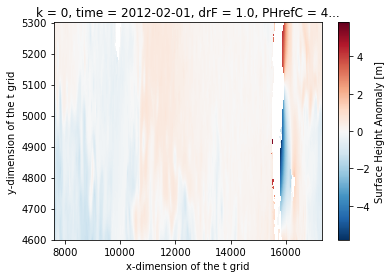

In [12]:
dsw = model.get_dataset(varnames=['U','V','Eta','Salt','Theta'], type='latlon').sel(time=slice('2012-02-01','2012-04-30'),
                                                             i=slice(7600,None),i_g=slice(7600,None),
                                                             j=slice(4600,5300),j_g=slice(4600,5300),
                                                             k=0)
dsw.Eta.isel(time=0).plot()

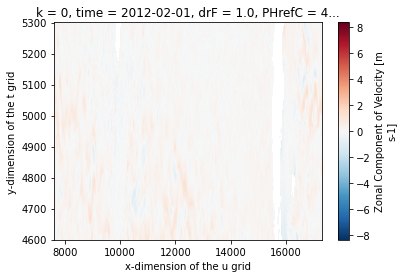

In [13]:
dsw.U.isel(time = 0).plot()

In [14]:
coords = dsw.coords.to_dataset().reset_coords()
dsw = dsw.reset_coords(drop=True)

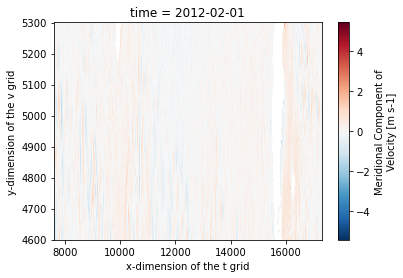

In [15]:
dsw.V.isel(time=0).plot()

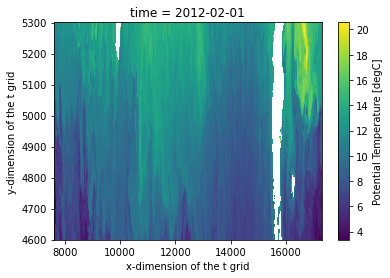

In [16]:
dsw.Theta.isel(time = 0).plot()

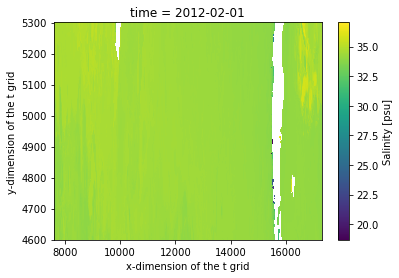

In [18]:
dsw.Salt.isel(time = 0).plot()

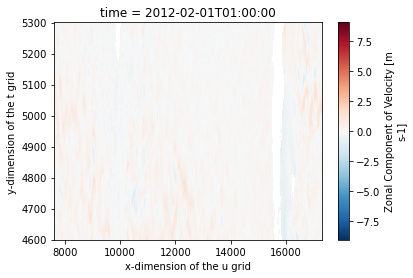

In [19]:
dsw.U.isel(time = 1).plot()